# Logistic Regression


In [1]:
import pandas as pd
import numpy as np
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter('ignore')

In [2]:
diabetes_data=pd.read_csv(r"C:\Users\91771\Downloads\Diabetes Example Data.csv")
diabetes_data.head(10)

,Blood Sugar Level,Diabetes
0,190,No
1,240,Yes
2,300,Yes
3,160,No
4,200,Yes
5,269,Yes
6,129,No
7,141,No
8,220,No
9,337,Yes


In [3]:
diabetes_data.shape

(10, 2)

In [4]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Blood Sugar Level  10 non-null     int64 
 1   Diabetes           10 non-null     object
dtypes: int64(1), object(1)
memory usage: 288.0+ bytes


In [5]:
diabetes_data['Diabetes']=diabetes_data['Diabetes'].map({'Yes':1,'No':0})
diabetes_data['Diabetes']

0    0
1    1
2    1
3    0
4    1
5    1
6    0
7    0
8    0
9    1
Name: Diabetes, dtype: int64

In [6]:
x=diabetes_data['Blood Sugar Level']
y=diabetes_data['Diabetes']

In [7]:
#data modelling
#GLM=Generalized Linear Model
import statsmodels.api as sm
logm1=sm.GLM(y,(sm.add_constant(x)),family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Diabetes   No. Observations:                   10
Model:                            GLM   Df Residuals:                        8
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2.5838
Date:                Mon, 15 Mar 2021   Deviance:                       5.1676
Time:                        20:58:52   Pearson chi2:                     4.32
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -13.5243      9.358     -1.445      0.148     -31.866       4.817
Blood Sugar Level     0.0637      0.044      1.439      0.150      -0.023       0.150
=====================================================================================
"""

In [8]:
vaccine_data=pd.read_csv(r"C:\Users\91771\Downloads\VaccineUsagePrediction\Vaccine Usage Prediction\Dataset\h1n1_vaccine_prediction.csv")
vaccine_data.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [9]:
vaccine_data.shape

(26707, 34)

In [10]:
vaccine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [11]:
vaccine_data.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [12]:
#There seems to be a lot of NA at various levels, lets see how much are the NA's
vaccine_data.isna().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [13]:
class Data_Auditor:
    def NA_in_Data(data_frame):
        result = (data_frame.isnull().sum().sum()) / (data_frame.shape[0] * data_frame.shape[1]) * 100
        return(print("Data has",round(result,2),"% NA's"))

    def Remove_Columns(data_frame,*args):
        list_of_cols = list(args)
        data_frame.drop(list_of_cols,axis = 1,inplace = True)

    def NA_in_Columns(data_frame):
        total_missing = data_frame.isnull().sum().sort_values(ascending=False)
        percent_missing = round(((data_frame.isnull().sum()/data_frame.isnull().count()).sort_values(ascending=False)*100),1)
        missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Missing_Obs', 'Percent_of_NA'])
        return(missing_data.head(10))

    def Most_Frequent_Data(data_frame,Column):
        Count = data_frame[Column].value_counts()
        Percentage = round(((data_frame[Column].value_counts()/data_frame.shape[0])*100),2)
        Summary_data = pd.concat([Count, Percentage], axis=1, keys=['Count','Percentage'])
        return(Summary_data)
    
    def Remove_Outlier(data_frame,low,high):
        quant_df = data_frame.quantile([low, high])
        for cols in list(data_frame.columns):
            if data_frame[cols].dtypes == 'float64' or data_frame[cols].dtypes == 'int64':
                df = data_frame[(data_frame[cols] > quant_df.loc[low, cols]) & (data_frame[cols] < quant_df.loc[high, cols])]
                return(df)

    def Remove_Multicollinearity(data_frame,threshold):
        corr_matrix = data_frame.corr().abs() # Create correlation matrix
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)) # Select upper triangle of correlation matrix
        to_drop = [column for column in upper.columns if any(upper[column] > threshold)]# Find features with correlation greater than threshold
        data_frame.drop(to_drop, axis=1, inplace=True)# Drop features
        print(to_drop,'is removed')


In [14]:
Data_Auditor.NA_in_Data(vaccine_data)
 #3.74% looks like a safe

Data has 3.74 % NA's


In [15]:
Data_Auditor.NA_in_Columns(vaccine_data)
 #Lets try to look up these values in the problem statement

,Missing_Obs,Percent_of_NA
has_health_insur,12274,46.0
income_level,4423,16.6
dr_recc_h1n1_vacc,2160,8.1
dr_recc_seasonal_vacc,2160,8.1
housing_status,2042,7.6
employment,1463,5.5
marital_status,1408,5.3
qualification,1407,5.3
chronic_medic_condition,971,3.6
cont_child_undr_6_mnths,820,3.1


In [16]:
del vaccine_data['has_health_insur'] #we will delete this column first as it has a lot of missing values

In [17]:
Data_Auditor.Most_Frequent_Data(vaccine_data,'income_level')

,Count,Percentage
"<= $75,000, Above Poverty",12777,47.84
"> $75,000",6810,25.50
Below Poverty,2697,10.10


In [18]:
Data_Auditor.Most_Frequent_Data(vaccine_data,'dr_recc_h1n1_vacc')

,Count,Percentage
0.0,19139,71.66
1.0,5408,20.25


In [19]:
Data_Auditor.Most_Frequent_Data(vaccine_data,'qualification')

,Count,Percentage
College Graduate,10097,37.81
Some College,7043,26.37
12 Years,5797,21.71
< 12 Years,2363,8.85


In [20]:
Data_Auditor.Most_Frequent_Data(vaccine_data,'marital_status')

,Count,Percentage
Married,13555,50.75
Not Married,11744,43.97


In [21]:
#Lets try to fill all the NA in one loop
NA_cols=['income_level','dr_recc_h1n1_vacc','dr_recc_seasonal_vacc','housing_status','employment','marital_status','qualification','chronic_medic_condition','cont_child_undr_6_mnths']

for cols in NA_cols:
    vaccine_data[cols].fillna(vaccine_data[cols].mode()[0], inplace=True)
    print("NA's in column",cols,"are filled")

NA's in column income_level are filled
NA's in column dr_recc_h1n1_vacc are filled
NA's in column dr_recc_seasonal_vacc are filled
NA's in column housing_status are filled
NA's in column employment are filled
NA's in column marital_status are filled
NA's in column qualification are filled
NA's in column chronic_medic_condition are filled
NA's in column cont_child_undr_6_mnths are filled


In [22]:
Data_Auditor.NA_in_Data(vaccine_data)

Data has 0.55 % NA's


In [23]:
Data_Auditor.NA_in_Columns(vaccine_data)

,Missing_Obs,Percent_of_NA
is_health_worker,804,3.0
sick_from_seas_vacc,537,2.0
is_seas_risky,514,1.9
is_seas_vacc_effective,462,1.7
sick_from_h1n1_vacc,395,1.5
is_h1n1_vacc_effective,391,1.5
is_h1n1_risky,388,1.5
no_of_adults,249,0.9
no_of_children,249,0.9
contact_avoidance,208,0.8


In [24]:
NA_cols=['is_health_worker','sick_from_seas_vacc','is_seas_risky','is_seas_vacc_effective','sick_from_h1n1_vacc','is_h1n1_vacc_effective','is_h1n1_risky','no_of_adults','no_of_children','contact_avoidance']

for cols in NA_cols:
    vaccine_data[cols].fillna(vaccine_data[cols].mode()[0], inplace=True)
    print("NA's in column",cols,"are filled")

NA's in column is_health_worker are filled
NA's in column sick_from_seas_vacc are filled
NA's in column is_seas_risky are filled
NA's in column is_seas_vacc_effective are filled
NA's in column sick_from_h1n1_vacc are filled
NA's in column is_h1n1_vacc_effective are filled
NA's in column is_h1n1_risky are filled
NA's in column no_of_adults are filled
NA's in column no_of_children are filled
NA's in column contact_avoidance are filled


In [25]:
Data_Auditor.NA_in_Data(vaccine_data)

Data has 0.07 % NA's


In [26]:
Data_Auditor.NA_in_Columns(vaccine_data)

,Missing_Obs,Percent_of_NA
avoid_touch_face,128,0.5
h1n1_awareness,116,0.4
h1n1_worry,92,0.3
avoid_large_gatherings,87,0.3
reduced_outside_home_cont,82,0.3
antiviral_medication,71,0.3
wash_hands_frequently,42,0.2
bought_face_mask,19,0.1
h1n1_vaccine,0,0.0
is_h1n1_vacc_effective,0,0.0


In [27]:
NA_cols=['avoid_touch_face','h1n1_awareness','h1n1_worry','avoid_large_gatherings','reduced_outside_home_cont','antiviral_medication','wash_hands_frequently','bought_face_mask','h1n1_vaccine','is_h1n1_vacc_effective']

for cols in NA_cols:
    vaccine_data[cols].fillna(vaccine_data[cols].mode()[0], inplace=True)
    print("NA's in column",cols,"are filled")

NA's in column avoid_touch_face are filled
NA's in column h1n1_awareness are filled
NA's in column h1n1_worry are filled
NA's in column avoid_large_gatherings are filled
NA's in column reduced_outside_home_cont are filled
NA's in column antiviral_medication are filled
NA's in column wash_hands_frequently are filled
NA's in column bought_face_mask are filled
NA's in column h1n1_vaccine are filled
NA's in column is_h1n1_vacc_effective are filled


In [28]:
Data_Auditor.NA_in_Data(vaccine_data)
#Now That the Data is free of NA lets go for the insights

Data has 0.0 % NA's


In [29]:
round(vaccine_data.corr().sort_values(by=['h1n1_vaccine'], ascending=False)['h1n1_vaccine'],2)

h1n1_vaccine                 1.00
dr_recc_h1n1_vacc            0.39
is_h1n1_risky                0.32
is_h1n1_vacc_effective       0.27
is_seas_risky                0.26
dr_recc_seasonal_vacc        0.22
is_seas_vacc_effective       0.18
is_health_worker             0.17
h1n1_worry                   0.12
h1n1_awareness               0.12
chronic_medic_condition      0.09
sick_from_h1n1_vacc          0.07
wash_hands_frequently        0.07
avoid_touch_face             0.07
bought_face_mask             0.07
cont_child_undr_6_mnths      0.07
contact_avoidance            0.05
antiviral_medication         0.04
reduced_outside_home_cont    0.02
avoid_large_gatherings       0.02
sick_from_seas_vacc          0.01
no_of_adults                 0.01
no_of_children              -0.00
unique_id                   -0.00
Name: h1n1_vaccine, dtype: float64

In [30]:
pd.crosstab(vaccine_data.dr_recc_h1n1_vacc,vaccine_data.h1n1_vaccine).apply(lambda r:r/r.sum(),axis=1)
#Most people trust their doctors

h1n1_vaccine,0,1
dr_recc_h1n1_vacc,,
0.0,0.868773,0.131227
1.0,0.467641,0.532359


In [31]:
pd.crosstab(vaccine_data.is_h1n1_risky,vaccine_data.h1n1_vaccine).apply(lambda r:r/r.sum(),axis=1)


h1n1_vaccine,0,1
is_h1n1_risky,,
1.0,0.911660,0.088340
2.0,0.830018,0.169982
3.0,0.826321,0.173679
4.0,0.607898,0.392102
5.0,0.489143,0.510857


In [32]:
pd.crosstab(vaccine_data.is_h1n1_vacc_effective,vaccine_data.h1n1_vaccine).apply(lambda r:r/r.sum(),axis=1)
#People who think vaccines are effective tend to take it

h1n1_vaccine,0,1
is_h1n1_vacc_effective,,
1.0,0.952596,0.047404
2.0,0.948870,0.051130
3.0,0.894347,0.105653
4.0,0.823008,0.176992
5.0,0.595172,0.404828


In [33]:
del vaccine_data['unique_id']

In [34]:
vaccine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26707 non-null  float64
 1   h1n1_awareness             26707 non-null  float64
 2   antiviral_medication       26707 non-null  float64
 3   contact_avoidance          26707 non-null  float64
 4   bought_face_mask           26707 non-null  float64
 5   wash_hands_frequently      26707 non-null  float64
 6   avoid_large_gatherings     26707 non-null  float64
 7   reduced_outside_home_cont  26707 non-null  float64
 8   avoid_touch_face           26707 non-null  float64
 9   dr_recc_h1n1_vacc          26707 non-null  float64
 10  dr_recc_seasonal_vacc      26707 non-null  float64
 11  chronic_medic_condition    26707 non-null  float64
 12  cont_child_undr_6_mnths    26707 non-null  float64
 13  is_health_worker           26707 non-null  flo

In [35]:
vaccine_data.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [36]:
vaccine_data[['chronic_medic_condition','cont_child_undr_6_mnths','is_health_worker','is_h1n1_vacc_effective','is_h1n1_risky','sick_from_h1n1_vacc','is_seas_vacc_effective','is_seas_risky',
       'sick_from_seas_vacc', 'age_bracket']].head()

,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket
0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years
1,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years
2,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years
3,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years
4,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years


In [37]:
vaccine_data.columns

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'is_h1n1_vacc_effective', 'is_h1n1_risky',
       'sick_from_h1n1_vacc', 'is_seas_vacc_effective', 'is_seas_risky',
       'sick_from_seas_vacc', 'age_bracket', 'qualification', 'race', 'sex',
       'income_level', 'marital_status', 'housing_status', 'employment',
       'census_msa', 'no_of_adults', 'no_of_children', 'h1n1_vaccine'],
      dtype='object')

In [38]:
#For categorical variables with multiple levels, create dummy features (one-hot encoded)

# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1=pd.get_dummies(vaccine_data[['age_bracket', 'qualification', 'race', 'sex',
       'income_level', 'marital_status', 'housing_status', 'employment',
       'census_msa']],drop_first=True)
Data_Auditor.Remove_Columns(vaccine_data,'age_bracket', 'qualification', 'race', 'sex',
       'income_level', 'marital_status', 'housing_status', 'employment',
       'census_msa')
# Adding the results to the master dataframe
vaccine_data=pd.concat([vaccine_data,dummy1],axis=1)

In [39]:
vaccine_data.shape

(26707, 42)

In [40]:
round(vaccine_data.corr().sort_values(by=['h1n1_vaccine'], ascending=False)['h1n1_vaccine'][1:],2)

dr_recc_h1n1_vacc                 0.39
is_h1n1_risky                     0.32
is_h1n1_vacc_effective            0.27
is_seas_risky                     0.26
dr_recc_seasonal_vacc             0.22
is_seas_vacc_effective            0.18
is_health_worker                  0.17
h1n1_worry                        0.12
h1n1_awareness                    0.12
chronic_medic_condition           0.09
sick_from_h1n1_vacc               0.07
wash_hands_frequently             0.07
avoid_touch_face                  0.07
bought_face_mask                  0.07
cont_child_undr_6_mnths           0.07
income_level_> $75,000            0.06
qualification_College Graduate    0.06
contact_avoidance                 0.05
antiviral_medication              0.04
age_bracket_55 - 64 Years         0.04
race_White                        0.03
reduced_outside_home_cont         0.02
age_bracket_65+ Years             0.02
avoid_large_gatherings            0.02
employment_Not in Labor Force     0.01
sick_from_seas_vacc      

In [41]:
#Test-Train Split

# Putting feature variable to X
y=vaccine_data['h1n1_vaccine']
X=vaccine_data.drop('h1n1_vaccine',axis=1)

from sklearn.model_selection import train_test_split as tts

X_train_lm,X_test_lm,y_train_lm,y_test_lm=tts(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [42]:
#Get column names
Scaling_variable=[]
for columns in X_train_lm.columns:
    if (X_train_lm[columns].max()>1):
        Scaling_variable.append(columns)
Scaling_variable

['h1n1_worry',
 'h1n1_awareness',
 'is_h1n1_vacc_effective',
 'is_h1n1_risky',
 'sick_from_h1n1_vacc',
 'is_seas_vacc_effective',
 'is_seas_risky',
 'sick_from_seas_vacc',
 'no_of_adults',
 'no_of_children']

In [43]:
#Scaling Variables
from sklearn.preprocessing import MinMaxScaler as mms
scaler=mms()
X_train_lm[Scaling_variable]=scaler.fit_transform(X_train_lm[Scaling_variable])
X_train_lm.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race_White,sex_Male,"income_level_> $75,000",income_level_Below Poverty,marital_status_Not Married,housing_status_Rent,employment_Not in Labor Force,employment_Unemployed,"census_msa_MSA, Principle City",census_msa_Non-MSA
17072,0.333333,0.5,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1,0,0,0,1,0,1,0,0,0
22079,0.000000,0.5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1,1,0,0,0,1,0,0,0,1
25030,0.666667,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1,0,0,0,1,0,1,0,0,0
8417,0.666667,0.5,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1,0,1,0,0,1,0,0,0,0
775,1.000000,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1,0,1,0,0,0,1,0,0,0


In [44]:
### Checking the Vaccine Rate
vaccine_rate=sum(vaccine_data['h1n1_vaccine'])/len(vaccine_data['h1n1_vaccine'])*100
vaccine_rate

21.24536638334519

In [45]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [46]:
#plt.figure(figsize=(16,10))
#sns.heatmap(vaccine_data.corr(),annot=True)
#plt.show()

In [47]:
import statsmodels.api as sm
logm1=sm.GLM(y_train_lm,(sm.add_constant(X_train_lm)),family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           h1n1_vaccine   No. Observations:                18694
Model:                            GLM   Df Residuals:                    18652
Model Family:                Binomial   Df Model:                           41
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7227.1
Date:                Mon, 15 Mar 2021   Deviance:                       14454.
Time:                        20:59:10   Pearson chi2:                 1.97e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -5.3040      0.177    -29.966      0.000      -5.651      -4.957
h1n1_worry                        -0.2873      0.086     -3.341      0.001      -0.456      -0.119
h1n1_awareness                     0.1738      0.076      2.272      0.023       0.024       0.324
antiviral_medication               0.2634      0.092      2.850      0.004       0.082       0.445
contact_avoidance                 -0.0438      0.054     -0.816      0.414      -0.149       0.061
bought_face_mask                   0.1394      0.081      1.721      0.085      -0.019       0.298
wash_hands_frequently              0.0552      0.068      0.812      0.417      -0.078       0.188
avoid_large_gatherings            -0.2299      0.056     -4.113      0.000      -0.339      -0.120
reduced_outside_home_cont          0.0013      0.057      0.023      0.982      -0.110       0.113
avoid_touch_face                   0.0257      0.052      0.493      0.622      -0.077       0.128
dr_recc_h1n1_vacc                  2.0523      0.063     32.690      0.000       1.929       2.175
dr_recc_seasonal_vacc             -0.4992      0.062     -8.103      0.000      -0.620      -0.378
chronic_medic_condition            0.0768      0.049      1.575      0.115      -0.019       0.172
cont_child_undr_6_mnths            0.2651      0.074      3.581      0.000       0.120       0.410
is_health_worker                   0.8204      0.063     13.022      0.000       0.697       0.944
is_h1n1_vacc_effective             2.5074      0.118     21.190      0.000       2.275       2.739
is_h1n1_risky                      1.4956      0.081     18.357      0.000       1.336       1.655
sick_from_h1n1_vacc               -0.0630      0.076     -0.826      0.409      -0.212       0.087
is_seas_vacc_effective             0.3055      0.107      2.865      0.004       0.097       0.514
is_seas_risky                      0.5207      0.078      6.645      0.000       0.367       0.674
sick_from_seas_vacc               -0.2869      0.075     -3.834      0.000      -0.434      -0.140
no_of_adults                      -0.0739      0.099     -0.749      0.454      -0.267       0.120
no_of_children                    -0.0313      0.085     -0.367      0.714      -0.198       0.136
age_bracket_35 - 44 Years         -0.0524      0.078     -0.668      0.504      -0.206       0.101
age_bracket_45 - 54 Years         -0.0035      0.074     -0.048      0.961      -0.148       0.141
age_bracket_55 - 64 Years          0.3379      0.076      4.475      0.000       0.190       0.486
age_bracket_65+ Years              0.4856      0.081      5.996      0.000       0.327       0.644
qualification_< 12 Years          -0.2238      0.093     -2.406      0.016      -0.406      -0.042
qualification_

In [48]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
rfe=RFE(logreg,25)
rfe=rfe.fit(X_train_lm,y_train_lm)

In [49]:
list(zip(X_train_lm.columns,rfe.support_,rfe.ranking_))

[('h1n1_worry', True, 1),
 ('h1n1_awareness', True, 1),
 ('antiviral_medication', True, 1),
 ('contact_avoidance', False, 10),
 ('bought_face_mask', True, 1),
 ('wash_hands_frequently', False, 9),
 ('avoid_large_gatherings', True, 1),
 ('reduced_outside_home_cont', False, 17),
 ('avoid_touch_face', False, 14),
 ('dr_recc_h1n1_vacc', True, 1),
 ('dr_recc_seasonal_vacc', True, 1),
 ('chronic_medic_condition', False, 3),
 ('cont_child_undr_6_mnths', True, 1),
 ('is_health_worker', True, 1),
 ('is_h1n1_vacc_effective', True, 1),
 ('is_h1n1_risky', True, 1),
 ('sick_from_h1n1_vacc', False, 5),
 ('is_seas_vacc_effective', True, 1),
 ('is_seas_risky', True, 1),
 ('sick_from_seas_vacc', True, 1),
 ('no_of_adults', False, 7),
 ('no_of_children', False, 12),
 ('age_bracket_35 - 44 Years', False, 8),
 ('age_bracket_45 - 54 Years', False, 16),
 ('age_bracket_55 - 64 Years', True, 1),
 ('age_bracket_65+ Years', True, 1),
 ('qualification_< 12 Years', True, 1),
 ('qualification_College Graduate', Tr

In [50]:
col=X_train_lm.columns[rfe.support_]
col

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'bought_face_mask', 'avoid_large_gatherings', 'dr_recc_h1n1_vacc',
       'dr_recc_seasonal_vacc', 'cont_child_undr_6_mnths', 'is_health_worker',
       'is_h1n1_vacc_effective', 'is_h1n1_risky', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket_55 - 64 Years',
       'age_bracket_65+ Years', 'qualification_< 12 Years',
       'qualification_College Graduate', 'qualification_Some College',
       'race_Hispanic', 'race_Other or Multiple', 'race_White', 'sex_Male',
       'marital_status_Not Married', 'census_msa_Non-MSA'],
      dtype='object')

In [51]:
X_train_sm=sm.add_constant(X_train_lm[col])
logm2=sm.GLM(y_train_lm,X_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           h1n1_vaccine   No. Observations:                18694
Model:                            GLM   Df Residuals:                    18668
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7233.3
Date:                Mon, 15 Mar 2021   Deviance:                       14467.
Time:                        20:59:14   Pearson chi2:                 1.96e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -5.2939      0.152    -34.894      0.000      -5.591      -4.997
h1n1_worry                        -0.2949      0.082     -3.586      0.000      -0.456      -0.134
h1n1_awareness                     0.1812      0.076      2.399      0.016       0.033       0.329
antiviral_medication               0.2600      0.092      2.832      0.005       0.080       0.440
bought_face_mask                   0.1462      0.081      1.811      0.070      -0.012       0.304
avoid_large_gatherings            -0.2282      0.047     -4.834      0.000      -0.321      -0.136
dr_recc_h1n1_vacc                  2.0564      0.063     32.849      0.000       1.934       2.179
dr_recc_seasonal_vacc             -0.4878      0.061     -7.958      0.000      -0.608      -0.368
cont_child_undr_6_mnths            0.2617      0.074      3.559      0.000       0.118       0.406
is_health_worker                   0.8121      0.061     13.242      0.000       0.692       0.932
is_h1n1_vacc_effective             2.5144      0.118     21.344      0.000       2.283       2.745
is_h1n1_risky                      1.4882      0.080     18.616      0.000       1.331       1.645
is_seas_vacc_effective             0.3087      0.106      2.901      0.004       0.100       0.517
is_seas_risky                      0.5327      0.078      6.833      0.000       0.380       0.686
sick_from_seas_vacc               -0.3130      0.068     -4.573      0.000      -0.447      -0.179
age_bracket_55 - 64 Years          0.3913      0.055      7.152      0.000       0.284       0.499
age_bracket_65+ Years              0.5705      0.054     10.533      0.000       0.464       0.677
qualification_< 12 Years          -0.2187      0.092     -2.376      0.018      -0.399      -0.038
qualification_College Graduate     0.1800      0.060      3.024      0.002       0.063       0.297
qualification_Some College         0.0973      0.064      1.531      0.126      -0.027       0.222
race_Hispanic                      0.2529      0.119      2.124      0.034       0.020       0.486
race_Other or Multiple             0.4753      0.119      4.001      0.000       0.242       0.708
race_White                         0.2636      0.090      2.936      0.003       0.088       0.439
sex_Male                           0.1826      0.044      4.132      0.000       0.096       0.269
marital_status_Not Married        -0.1480      0.044     -3.343      0.001      -0.235      -0.061
census_msa_Non-MSA                 0.0610      0.049      1.257      0.209      -0.034       0.156
==================================================================================================
"""

In [52]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
rfe=RFE(logreg,19)
rfe=rfe.fit(X_train_lm,y_train_lm)

In [53]:
list(zip(X_train_lm.columns,rfe.support_,rfe.ranking_))

[('h1n1_worry', True, 1),
 ('h1n1_awareness', True, 1),
 ('antiviral_medication', True, 1),
 ('contact_avoidance', False, 16),
 ('bought_face_mask', False, 4),
 ('wash_hands_frequently', False, 15),
 ('avoid_large_gatherings', True, 1),
 ('reduced_outside_home_cont', False, 23),
 ('avoid_touch_face', False, 20),
 ('dr_recc_h1n1_vacc', True, 1),
 ('dr_recc_seasonal_vacc', True, 1),
 ('chronic_medic_condition', False, 9),
 ('cont_child_undr_6_mnths', True, 1),
 ('is_health_worker', True, 1),
 ('is_h1n1_vacc_effective', True, 1),
 ('is_h1n1_risky', True, 1),
 ('sick_from_h1n1_vacc', False, 11),
 ('is_seas_vacc_effective', True, 1),
 ('is_seas_risky', True, 1),
 ('sick_from_seas_vacc', True, 1),
 ('no_of_adults', False, 13),
 ('no_of_children', False, 18),
 ('age_bracket_35 - 44 Years', False, 14),
 ('age_bracket_45 - 54 Years', False, 22),
 ('age_bracket_55 - 64 Years', True, 1),
 ('age_bracket_65+ Years', True, 1),
 ('qualification_< 12 Years', True, 1),
 ('qualification_College Graduate

In [54]:
col=X_train_lm.columns[rfe.support_]
col

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'avoid_large_gatherings', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'cont_child_undr_6_mnths', 'is_health_worker', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'is_seas_vacc_effective', 'is_seas_risky',
       'sick_from_seas_vacc', 'age_bracket_55 - 64 Years',
       'age_bracket_65+ Years', 'qualification_< 12 Years', 'race_Hispanic',
       'race_Other or Multiple', 'race_White'],
      dtype='object')

In [55]:
X_train_sm=sm.add_constant(X_train_lm[col])
logm2=sm.GLM(y_train_lm,X_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           h1n1_vaccine   No. Observations:                18694
Model:                            GLM   Df Residuals:                    18674
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7257.3
Date:                Mon, 15 Mar 2021   Deviance:                       14515.
Time:                        20:59:18   Pearson chi2:                 1.97e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -5.1865      0.140    -37.142      0.000      -5.460      -4.913
h1n1_worry                   -0.3002      0.082     -3.682      0.000      -0.460      -0.140
h1n1_awareness                0.2226      0.074      3.009      0.003       0.078       0.368
antiviral_medication          0.2717      0.091      2.984      0.003       0.093       0.450
avoid_large_gatherings       -0.2327      0.046     -5.017      0.000      -0.324      -0.142
dr_recc_h1n1_vacc             2.0616      0.062     32.996      0.000       1.939       2.184
dr_recc_seasonal_vacc        -0.4967      0.061     -8.123      0.000      -0.617      -0.377
cont_child_undr_6_mnths       0.2572      0.073      3.511      0.000       0.114       0.401
is_health_worker              0.7936      0.060     13.131      0.000       0.675       0.912
is_h1n1_vacc_effective        2.5328      0.117     21.558      0.000       2.303       2.763
is_h1n1_risky                 1.4734      0.080     18.501      0.000       1.317       1.629
is_seas_vacc_effective        0.2961      0.106      2.795      0.005       0.088       0.504
is_seas_risky                 0.5259      0.078      6.766      0.000       0.374       0.678
sick_from_seas_vacc          -0.3245      0.068     -4.760      0.000      -0.458      -0.191
age_bracket_55 - 64 Years     0.3964      0.055      7.262      0.000       0.289       0.503
age_bracket_65+ Years         0.5385      0.054     10.025      0.000       0.433       0.644
qualification_< 12 Years     -0.3264      0.084     -3.899      0.000      -0.490      -0.162
race_Hispanic                 0.2964      0.118      2.504      0.012       0.064       0.528
race_Other or Multiple        0.5314      0.118      4.493      0.000       0.300       0.763
race_White                    0.3106      0.089      3.500      0.000       0.137       0.484
=============================================================================================
"""

In [56]:
y_train_pred=res.predict(X_train_sm)
y_train_pred[:10]

17072    0.260428
22079    0.335446
25030    0.103948
8417     0.279334
775      0.433757
10001    0.433400
10259    0.102930
26510    0.085275
5941     0.063404
20124    0.091430
dtype: float64

In [57]:
y_train_pred=y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.26042771, 0.33544602, 0.10394793, 0.2793338 , 0.43375736,
       0.43339957, 0.10293016, 0.08527479, 0.06340424, 0.09143025])

In [58]:
y_train_pred_final=pd.DataFrame({'Vaccinated':y_train_lm.values, 'Vaccinated_Prob':y_train_pred})
y_train_pred_final['ID']=y_train_lm.index
y_train_pred_final.head()

,Vaccinated,Vaccinated_Prob,ID
0,0,0.260428,17072
1,1,0.335446,22079
2,0,0.103948,25030
3,0,0.279334,8417
4,1,0.433757,775


In [59]:
y_train_pred_final['predicted']=y_train_pred_final.Vaccinated_Prob.map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

,Vaccinated,Vaccinated_Prob,ID,predicted
0,0,0.260428,17072,0
1,1,0.335446,22079,0
2,0,0.103948,25030,0
3,0,0.279334,8417,0
4,1,0.433757,775,0


In [60]:
from sklearn import metrics
confusion=metrics.confusion_matrix(y_train_pred_final.Vaccinated, y_train_pred_final.predicted)
print(confusion)

[[13929   767]
 [ 2320  1678]]


In [61]:
print(metrics.accuracy_score(y_train_pred_final.Vaccinated,y_train_pred_final.predicted))

0.8348668021825184


In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Features']=X_train_lm[col].columns
vif['VIF']=[variance_inflation_factor(X_train_lm[col].values,i) for i in range(X_train_lm[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
10,is_seas_vacc_effective,11.99
8,is_h1n1_vacc_effective,11.55
18,race_White,7.33
1,h1n1_awareness,5.43
0,h1n1_worry,5.38
11,is_seas_risky,4.26
9,is_h1n1_risky,3.49
5,dr_recc_seasonal_vacc,2.41
4,dr_recc_h1n1_vacc,2.08
12,sick_from_seas_vacc,1.84


In [63]:
col=col.drop('is_seas_vacc_effective')
col=col.drop('is_h1n1_vacc_effective')
col=col.drop('race_White')
col=col.drop('h1n1_worry')
col=col.drop('race_Hispanic')

In [64]:
X_train_sm=sm.add_constant(X_train_lm[col])
logm3=sm.GLM(y_train_lm,X_train_sm,family=sm.families.Binomial())
res=logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           h1n1_vaccine   No. Observations:                18694
Model:                            GLM   Df Residuals:                    18679
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7600.3
Date:                Mon, 15 Mar 2021   Deviance:                       15201.
Time:                        20:59:20   Pearson chi2:                 1.87e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -3.1541      0.069    -45.845      0.000      -3.289      -3.019
h1n1_awareness                0.3965      0.071      5.593      0.000       0.258       0.535
antiviral_medication          0.2558      0.088      2.896      0.004       0.083       0.429
avoid_large_gatherings       -0.2351      0.044     -5.291      0.000      -0.322      -0.148
dr_recc_h1n1_vacc             2.0577      0.061     33.917      0.000       1.939       2.177
dr_recc_seasonal_vacc        -0.4519      0.060     -7.589      0.000      -0.569      -0.335
cont_child_undr_6_mnths       0.2065      0.071      2.907      0.004       0.067       0.346
is_health_worker              0.7737      0.059     13.165      0.000       0.659       0.889
is_h1n1_risky                 1.6294      0.076     21.571      0.000       1.481       1.777
is_seas_risky                 0.7692      0.074     10.437      0.000       0.625       0.914
sick_from_seas_vacc          -0.4466      0.065     -6.869      0.000      -0.574      -0.319
age_bracket_55 - 64 Years     0.4059      0.053      7.675      0.000       0.302       0.510
age_bracket_65+ Years         0.5498      0.051     10.683      0.000       0.449       0.651
qualification_< 12 Years     -0.3358      0.080     -4.199      0.000      -0.493      -0.179
race_Other or Multiple        0.1712      0.085      2.012      0.044       0.004       0.338
=============================================================================================
"""

In [65]:
y_train_pred=res.predict(X_train_sm)
y_train_pred[:10]

17072    0.250084
22079    0.315795
25030    0.194672
8417     0.252484
775      0.500805
10001    0.320362
10259    0.067415
26510    0.072434
5941     0.053395
20124    0.250241
dtype: float64

In [66]:
y_train_pred=y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.25008358, 0.31579481, 0.19467195, 0.25248366, 0.50080476,
       0.3203617 , 0.06741473, 0.072434  , 0.05339467, 0.25024132])

In [67]:
y_train_pred_final=pd.DataFrame({'Vaccinated':y_train_lm.values, 'Vaccinated_Prob':y_train_pred})
y_train_pred_final['ID']=y_train_lm.index
y_train_pred_final.head()

,Vaccinated,Vaccinated_Prob,ID
0,0,0.250084,17072
1,1,0.315795,22079
2,0,0.194672,25030
3,0,0.252484,8417
4,1,0.500805,775


In [69]:
y_train_pred_final['predicted'] = y_train_pred_final.Vaccinated_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Vaccinated,Vaccinated_Prob,ID,predicted
0,0,0.250084,17072,0
1,1,0.315795,22079,0
2,0,0.194672,25030,0
3,0,0.252484,8417,0
4,1,0.500805,775,1


In [70]:
#Lets Check for Accuracy
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Vaccinated, y_train_pred_final.predicted )
print(confusion)


[[13922   774]
 [ 2472  1526]]


In [71]:
print(metrics.accuracy_score(y_train_pred_final.Vaccinated, y_train_pred_final.predicted))

0.82636139937948


In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_lm[col].values, i) for i in range(X_train_lm[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,is_seas_risky,3.89
7,is_h1n1_risky,3.25
0,h1n1_awareness,2.82
4,dr_recc_seasonal_vacc,2.39
3,dr_recc_h1n1_vacc,2.07
9,sick_from_seas_vacc,1.74
2,avoid_large_gatherings,1.62
11,age_bracket_65+ Years,1.45
10,age_bracket_55 - 64 Years,1.34
6,is_health_worker,1.20


In [74]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [75]:
y_train_pred[:10]

array([0.25008358, 0.31579481, 0.19467195, 0.25248366, 0.50080476,
       0.3203617 , 0.06741473, 0.072434  , 0.05339467, 0.25024132])

In [76]:

y_train_pred_final = pd.DataFrame({'Vaccinated':y_train_lm.values, 'Vaccinated_Prob':y_train_pred})
y_train_pred_final['ID'] = y_train_lm.index
y_train_pred_final.head()

,Vaccinated,Vaccinated_Prob,ID
0,0,0.250084,17072
1,1,0.315795,22079
2,0,0.194672,25030
3,0,0.252484,8417
4,1,0.500805,775


In [77]:

y_train_pred_final['predicted'] = y_train_pred_final.Vaccinated_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Vaccinated,Vaccinated_Prob,ID,predicted
0,0,0.250084,17072,0
1,1,0.315795,22079,0
2,0,0.194672,25030,0
3,0,0.252484,8417,0
4,1,0.500805,775,1


In [78]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Vaccinated, y_train_pred_final.predicted))

0.82636139937948


In [79]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [80]:
# Lets see the sensitivity of our logistic regression model
round(TP / float(TP+FN),2)

0.38

In [81]:
#Let us calculate the specificity
round(TN / float(TN+FP),2)

0.95

In [82]:
print(round((FP/float(TP+FP)),2))

0.34


In [83]:
print(TP/ float(TP+FP))

0.6634782608695652


In [84]:
print(TN/ float(TN+FN))

0.8492131267536904


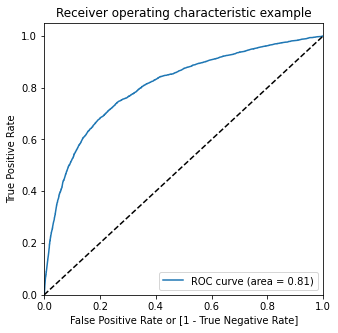

In [85]:
# Defining the function to plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_pred_final.Vaccinated, y_train_pred_final.Vaccinated_Prob)

In [86]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Vaccinated_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Vaccinated,Vaccinated_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.250084,17072,0,1,1,1,0,0,0,0,0,0,0
1,1,0.315795,22079,0,1,1,1,1,0,0,0,0,0,0
2,0,0.194672,25030,0,1,1,0,0,0,0,0,0,0,0
3,0,0.252484,8417,0,1,1,1,0,0,0,0,0,0,0
4,1,0.500805,775,1,1,1,1,1,1,1,0,0,0,0


In [87]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Vaccinated, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.213865  1.000000  0.000000
0.1   0.1  0.570129  0.879440  0.485983
0.2   0.2  0.750455  0.721611  0.758302
0.3   0.3  0.808120  0.595048  0.866086
0.4   0.4  0.824489  0.485243  0.916780
0.5   0.5  0.826361  0.381691  0.947333
0.6   0.6  0.819889  0.275888  0.967882
0.7   0.7  0.809083  0.169335  0.983125
0.8   0.8  0.797261  0.069285  0.995305
0.9   0.9  0.786670  0.003502  0.999728


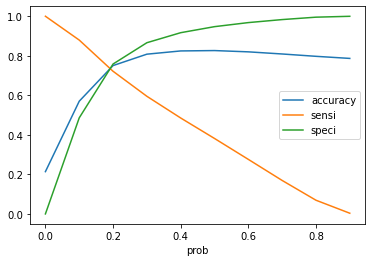

In [88]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [89]:
#Model Evaluation Metrics

# Creating new column 'predicted' with 1 if Churn_Prob > 0.2 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Vaccinated_Prob.map(lambda x: 1 if x > 0.2 else 0)
y_train_pred_final['predicted'].value_counts()

0    12257
1     6437
Name: predicted, dtype: int64

In [90]:
X_test_lm[Scaling_variable] = scaler.transform(X_test_lm[Scaling_variable])
X_test_lm[Scaling_variable]

,h1n1_worry,h1n1_awareness,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children
3061,0.666667,0.5,1.00,0.75,0.75,1.00,1.00,0.75,0.333333,0.000000
17529,0.000000,0.5,0.75,0.00,0.00,0.25,0.25,0.00,0.666667,0.333333
5241,0.333333,0.0,0.75,0.25,0.25,0.75,0.25,0.25,0.333333,0.333333
24207,0.666667,1.0,0.50,0.25,0.25,1.00,0.25,0.25,0.333333,0.000000
7466,0.333333,1.0,0.50,0.00,0.00,0.75,0.00,0.00,0.333333,0.000000
...,...,...,...,...,...,...,...,...,...,...
4900,0.333333,1.0,1.00,0.75,0.75,1.00,0.75,0.75,0.000000,0.000000
24521,0.333333,1.0,1.00,0.25,0.25,1.00,0.25,0.25,0.333333,0.000000
13707,0.000000,0.5,0.50,0.50,0.25,1.00,0.50,0.25,0.000000,0.000000
22174,0.000000,1.0,0.50,0.25,0.00,0.75,0.00,1.00,0.333333,0.000000


In [91]:
X_test_lm = X_test_lm[col]
X_test_lm.head()

,h1n1_awareness,antiviral_medication,avoid_large_gatherings,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,cont_child_undr_6_mnths,is_health_worker,is_h1n1_risky,is_seas_risky,sick_from_seas_vacc,age_bracket_55 - 64 Years,age_bracket_65+ Years,qualification_< 12 Years,race_Other or Multiple
3061,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.75,1.00,0.75,1,0,0,0
17529,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.25,0.00,0,0,0,0
5241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.25,0.25,0,0,0,0
24207,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.25,0.25,0.25,0,0,1,0
7466,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0,0,0,0


In [93]:
X_test_sm = sm.add_constant(X_test_lm)
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3061     0.244397
17529    0.059328
5241     0.065006
24207    0.066981
7466     0.059659
5558     0.078145
13657    0.682131
17613    0.049462
5403     0.059659
981      0.197707
dtype: float64

In [94]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [95]:
y_pred_1.head()

,0
3061,0.244397
17529,0.059328
5241,0.065006
24207,0.066981
7466,0.059659


In [96]:
y_test_df = pd.DataFrame(y_test_lm)

In [97]:
y_test_df['ID'] = y_test_df.index

In [98]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [99]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [100]:
y_pred_final.head()

,h1n1_vaccine,ID,0
0,1,3061,0.244397
1,0,17529,0.059328
2,0,5241,0.065006
3,0,24207,0.066981
4,0,7466,0.059659


In [101]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Vaccine_Prob'})

In [102]:
y_pred_final = y_pred_final[['ID','h1n1_vaccine','Vaccine_Prob']]

In [103]:
y_pred_final.head()

,ID,h1n1_vaccine,Vaccine_Prob
0,3061,1,0.244397
1,17529,0,0.059328
2,5241,0,0.065006
3,24207,0,0.066981
4,7466,0,0.059659


In [104]:
y_pred_final['final_predicted'] = y_pred_final.Vaccine_Prob.map(lambda x: 1 if x > 0.20 else 0)
y_pred_final.head()

,ID,h1n1_vaccine,Vaccine_Prob,final_predicted
0,3061,1,0.244397,1
1,17529,0,0.059328,0
2,5241,0,0.065006,0
3,24207,0,0.066981,0
4,7466,0,0.059659,0


In [105]:
print(metrics.accuracy_score(y_pred_final.h1n1_vaccine, y_pred_final.final_predicted))

0.7608885560963434
